# Algorytm genetyczny - wstępna implementacja

## Aleksandra Wichrowska, 291140

"Potwierzam samodzielność poniższej pracy i niekorzystanie przeze mnie z niedozwolonych źródeł." 

~ Aleksandra Wichrowska

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from copy import deepcopy

Na ten moment algorytm przyjmuje następujące założenia:


* krzyżowanie osobników odbywa się przez **krzyżowanie jednopunktowe**
    - punkt podziału (krzyżowania) jest losowany w sposób jednostajny


* stosowana jest **mutacja gaussowska**, użytkownik może ustalić:
    - parametr *mutation_ratio*, który ustala jaka część populacji zostanie poddana mutacji (domyślnie: $20$%)
    - parametr *mutation_coef*, który przeskalowuje wektor mutujący osobnika (domyślnie wektor jest losowany z rokładu *N(0,1)*, wartość parametru to $1$)
    
    
* selekcja osobników odbywa się na zasadach **selekcji progowej**, czyli w następujący sposób:
    - zostawiamy $ \frac {n}{2} $ najlepszych osobników (według funkcji celu)
    - generujemy kolejne $ \frac {n}{2} $ osobników przez krzyżowanie osobników wybranych w poprzednim punkcie

In [2]:
class GeneticAlgorithm:
    
    def __init__ (self, size, dim, eval_function, mutation_ratio = 0.2, mutation_coef = 1 , mutation_type='gauss'):
    
        self.size = size # how many individuals
        self.dim = dim   # how many gens each individual has
        self.population = self.generate_population(self.size, self.dim)
        self.eval_function = eval_function
        self.mutation_ratio = mutation_ratio
        self.mutation_coef = mutation_coef
        self.mutation_type = mutation_type
    
    def generate_population(self, size, dim):
        return np.random.uniform(0,1,(size, dim))
    
    def evaluate(self):
        return np.apply_along_axis(self.eval_function, 1, self.population)
    
    ##################################
    ############ MUTATION ############
    ##################################
    
    def mutate_population(self):
        if self.mutation_type == 'gauss':
            self.population += self.mutation_coef * self.gauss_mutation()    
    
    def gauss_mutation(self):
        mutation = np.zeros((self.size, self.dim))
        n_mutated = int(self.size * self.mutation_ratio)
        observations_mutated = np.random.choice(self.size, n_mutated, replace=False)
        mutation[observations_mutated, :] = np.random.standard_normal((n_mutated, self.dim))
        return mutation
    
    ##################################
    ########### CROSS OVER ###########
    ##################################
    
    def cross_over_population(self):
        n = self.population.shape[0]
        population_sorted = np.argsort(self.evaluate())
        old_population = self.population[population_sorted[:int(n/2)]]
        
        new_population = np.zeros((self.size, self.dim))
        new_population[:int(n/2), :] = old_population
        for i in range(int(n/2), n):
            new_population[i] = self.generate_new_individual(old_population)
        
        self.population = new_population
    
    ##################################
    ######### NEW GENERATION #########
    ##################################
    
    def generate_new_individual(self, old_population):
        n = old_population.shape[0]
        individuals_to_cross = np.random.choice(n, 2, replace=False)
        cross_bit = np.random.choice((1, self.dim-1), 1)[0]
        
        new_individual = np.zeros((1, self.dim))
        new_individual[0, :cross_bit] = old_population[individuals_to_cross[0], :cross_bit]
        new_individual[0, cross_bit:] = old_population[individuals_to_cross[1], cross_bit:]
        
        return new_individual
    
    
    ##################################
    ############ TRAINING ############
    ##################################
        
    def train_one_epoch(self):
        self.cross_over_population()
        self.mutate_population()
        
    def train_population(self, epochs=20):
        results = []
        results.append(min(self.evaluate()))
        for i in range(epochs):
            self.train_one_epoch()
            results.append(min(self.evaluate()))
        return results

## Funkcja kwadratowa

Sprawdzę poprawność działania algorytmu do zadania minimalizacji funkcji $$ x^2 + y^2 + 2z^2 $$.

In [3]:
def square_function(x):
    return x[0]**2 + x[1]**2 + 2*x[2]**2

Inicjalizuję algorytm genetyczny z populacją liczącą 1000 osobników, pozostałe parametry zostawiam domyślne.

In [4]:
ga = GeneticAlgorithm(1000, 3, square_function)

Uczę algorytm genetyczny w 100 epokach.

In [5]:
results = ga.train_population(100)

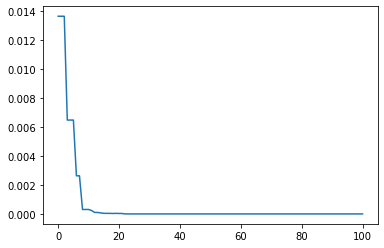

In [6]:
plt.plot(results)
plt.show()

In [7]:
print(f'W populacji początkowej najmniejsza wartość funkcji celu wynosiła: {results[0]}')
print(f'Po 10 generacjach najmniejsza wartość funkcji celu wynosiła: {results[10]}')
print(f'Po 100 generacjach najmniejsza wartość funkcji celu wynosiła: {results[100]}')

W populacji początkowej najmniejsza wartość funkcji celu wynosiła: 0.013644555956738334
Po 10 generacjach najmniejsza wartość funkcji celu wynosiła: 0.0003301275347030637
Po 100 generacjach najmniejsza wartość funkcji celu wynosiła: 2.4478298097256594e-05


Widzimy, że w kolejnych generacjach następujące znaczące zmniejszenie funkcji celu, a więc algorytm działa zgodnie z oczekiwaniami.

## Porównanie działania dla różnych wartości `mutation_ratio`

In [16]:
ga = GeneticAlgorithm(1000, 3, square_function, mutation_ratio = 0)
population_copy = deepcopy(ga.population)
results0 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_ratio = 0.05)
ga.population = population_copy
results1 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_ratio = 0.1)
ga.population = population_copy
results2 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_ratio = 0.2)
ga.population = population_copy
results3 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_ratio = 0.5)
ga.population = population_copy
results4 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_ratio = 1)
ga.population = population_copy
results5 = ga.train_population(100)

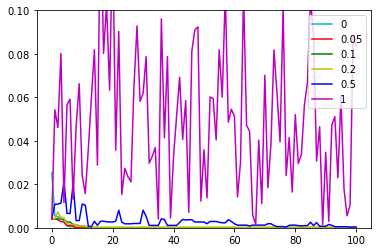

In [17]:
plt.plot()
plt.plot(results0, 'c')
plt.plot(results1, 'r')
plt.plot(results2, 'g')
plt.plot(results3, 'y')
plt.plot(results4, 'b')
plt.plot(results5, 'm')
plt.legend([0, 0.05, 0.1, 0.2, 0.5, 1])
plt.ylim(0, 0.1)
plt.show()

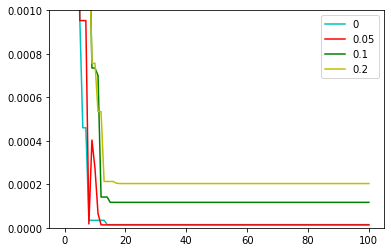

In [19]:
plt.plot()
plt.plot(results0, 'c')
plt.plot(results1, 'r')
plt.plot(results2, 'g')
plt.plot(results3, 'y')
plt.legend([0, 0.05, 0.1, 0.2])
plt.ylim(0, 0.001)
plt.show()

**Wniosek:** Im mniejsze `mutation_ratio` tym lepsze wyniki algorytmu.

## Porównanie działania dla różnych wartości `mutation_coef`


In [22]:
ga = GeneticAlgorithm(1000, 3, square_function, mutation_coef = 0.1)
population_copy = deepcopy(ga.population)
results1 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_coef = 0.5)
ga.population = population_copy
results2 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_coef = 1)
ga.population = population_copy
results3 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_coef = 1.5)
ga.population = population_copy
results4 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_coef = 2)
ga.population = population_copy
results5 = ga.train_population(100)

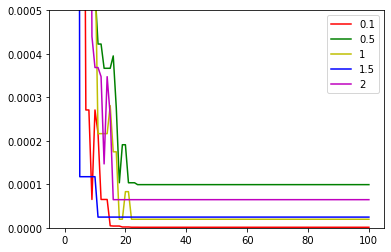

In [23]:
plt.plot()
plt.plot(results1, 'r')
plt.plot(results2, 'g')
plt.plot(results3, 'y')
plt.plot(results4, 'b')
plt.plot(results5, 'm')
plt.legend([0.1, 0.5, 1, 1.5, 2])
plt.ylim(0, 0.0005)
plt.show()

**Wniosek:** Trudno wyciągnąć konkretne wnioski, najlepsze wyniki osiągnał algorytm lda `mutation_coef = 0.1` , kolejne dla `mutation_coef = 1`, a wartość `mutation_coef = 0.5` wypadła najgorzej.

## A jak zadziała algorytm gdy dane w pierwszej generacji będą leżały daleko od minimum?

In [24]:
ga = GeneticAlgorithm(1000, 3, square_function)
ga.population *= 100 #przeskalowanie populacji poczatkowej do rozkładu U(0,100) zamiast U(0,1)
results1 = ga.train_population(100)

In [25]:
print(f'W populacji początkowej najmniejsza wartość funkcji celu wynosiła: {results1[0]}')
print(f'Po 10 generacjach najmniejsza wartość funkcji celu wynosiła: {results1[10]}')
print(f'Po 100 generacjach najmniejsza wartość funkcji celu wynosiła: {results1[100]}')

W populacji początkowej najmniejsza wartość funkcji celu wynosiła: 185.97043742262065
Po 10 generacjach najmniejsza wartość funkcji celu wynosiła: 0.17148442097880237
Po 100 generacjach najmniejsza wartość funkcji celu wynosiła: 7.400860119214515e-05


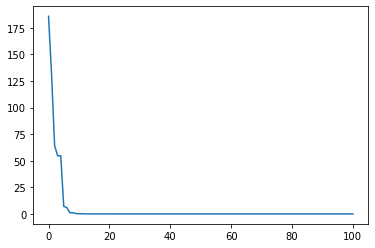

In [26]:
plt.plot(results1)
plt.show()

Widzimy, że w kolejnych generacjach następujące znaczące zmniejszenie funkcji celu, a więc także przy danych początkowych bardzo oddalonych od minimum algorytm działa zgodnie z oczekiwaniami.

In [27]:
ga = GeneticAlgorithm(1000, 3, square_function, mutation_coef = 0.1)
ga.population *= 100
population_copy = deepcopy(ga.population)
results1 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_coef = 0.5)
ga.population = population_copy
results2 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_coef = 1)
ga.population = population_copy
results3 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_coef = 1.5)
ga.population = population_copy
results4 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 3, square_function, mutation_coef = 2)
ga.population = population_copy
results5 = ga.train_population(100)

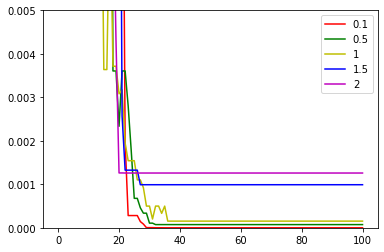

In [31]:
plt.plot()
plt.plot(results1, 'r')
plt.plot(results2, 'g')
plt.plot(results3, 'y')
plt.plot(results4, 'b')
plt.plot(results5, 'm')
plt.legend([0.1, 0.5, 1, 1.5, 2])
plt.ylim(0, 0.005)
plt.show()

## Funkcja Rastringa

Sprawdzę poprawność działania algorytmu do zadania minimalizacji funkcji: $$ f(x) = 10d + \sum_{i=1}^{d} (x_i^2 - 10 cos (2\pi x_i) ) $$ dla $ d = 5 $.

In [32]:
def rastring_function(x):
    return 10*5 + sum(x**2 - 10*np.cos(2*np.pi*x))

Inicjalizuję algorytm genetyczny z populacją liczącą 1000 osobników, pozostałe parametry zostawiam domyślne.

In [33]:
ga = GeneticAlgorithm(1000, 5, rastring_function)

Uczę algorytm genetyczny w 100 epokach.

In [34]:
results = ga.train_population(1000)

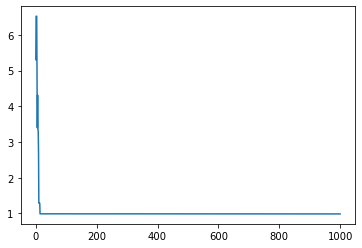

In [39]:
plt.plot(results)
plt.show()

In [40]:
print(f'W populacji początkowej najmniejsza wartość funkcji celu wynosiła: {results[0]}')
print(f'Po 100 generacjach najmniejsza wartość funkcji celu wynosiła: {results[100]}')
print(f'Po 1000 generacjach najmniejsza wartość funkcji celu wynosiła: {results[1000]}')

W populacji początkowej najmniejsza wartość funkcji celu wynosiła: 5.302006831680245
Po 100 generacjach najmniejsza wartość funkcji celu wynosiła: 0.9880918780253012
Po 1000 generacjach najmniejsza wartość funkcji celu wynosiła: 0.9880918780253012


Widzimy, że w kolejnych generacjach następujące znaczące zmniejszenie funkcji celu, a więc algorytm działa zgodnie z oczekiwaniami. Jednak już po kilku iteracjach osiąga wartość `0.98` i wynik nie poprawia się już, być może algorytm wpadł w minimum lokalne.

## Porównanie działania dla różnych wartości `mutation_ratio`

In [43]:
ga = GeneticAlgorithm(1000, 5, rastring_function, mutation_ratio = 0)
population_copy = deepcopy(ga.population)
results0 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 5, rastring_function, mutation_ratio = 0.05)
ga.population = population_copy
results1 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 5, rastring_function, mutation_ratio = 0.1)
ga.population = population_copy
results2 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 5, rastring_function, mutation_ratio = 0.2)
ga.population = population_copy
results3 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 5, rastring_function, mutation_ratio = 0.5)
ga.population = population_copy
results4 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 5, rastring_function, mutation_ratio = 1)
ga.population = population_copy
results5 = ga.train_population(100)

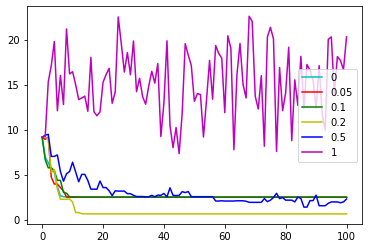

In [46]:
plt.plot()
plt.plot(results0, 'c')
plt.plot(results1, 'r')
plt.plot(results2, 'g')
plt.plot(results3, 'y')
plt.plot(results4, 'b')
plt.plot(results5, 'm')
plt.legend([0, 0.05, 0.1, 0.2, 0.5, 1])
plt.show()

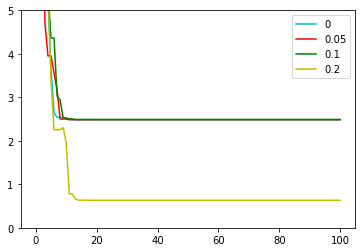

In [47]:
plt.plot()
plt.plot(results0, 'c')
plt.plot(results1, 'r')
plt.plot(results2, 'g')
plt.plot(results3, 'y')
plt.legend([0, 0.05, 0.1, 0.2])
plt.ylim(0,5)
plt.show()

Dla `mutation_ratio = 0.2` (czyli wartości domyślnej algorytm osiąga zdecydowanie najlepsze wyniki.

## Porównanie działania dla różnych wartości `mutation_coef`


In [48]:
ga = GeneticAlgorithm(1000, 5, rastring_function, mutation_coef = 0.1)
population_copy = deepcopy(ga.population)
results1 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 5, rastring_function, mutation_coef = 0.5)
ga.population = population_copy
results2 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 5, rastring_function, mutation_coef = 1)
ga.population = population_copy
results3 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 5, rastring_function, mutation_coef = 1.5)
ga.population = population_copy
results4 = ga.train_population(100)
ga = GeneticAlgorithm(1000, 5, rastring_function, mutation_coef = 2)
ga.population = population_copy
results5 = ga.train_population(100)

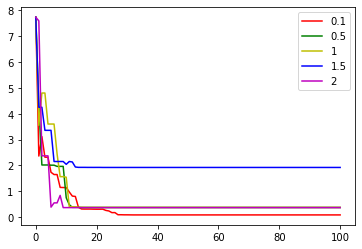

In [49]:
plt.plot()
plt.plot(results1, 'r')
plt.plot(results2, 'g')
plt.plot(results3, 'y')
plt.plot(results4, 'b')
plt.plot(results5, 'm')
plt.legend([0.1, 0.5, 1, 1.5, 2])
plt.show()

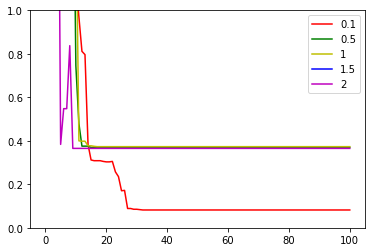

In [50]:
plt.plot()
plt.plot(results1, 'r')
plt.plot(results2, 'g')
plt.plot(results3, 'y')
plt.plot(results4, 'b')
plt.plot(results5, 'm')
plt.legend([0.1, 0.5, 1, 1.5, 2])
plt.ylim(0,1)
plt.show()

Zmniejszenie `mutation_coef` do wartości `0.1` pozwoliło uniknąć zatrzymania algorytmu w minimum lokalnym i osiągnięcia wartości minimalnej `0.081` (minimum funkcji to `0`).